# Детектування границь

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

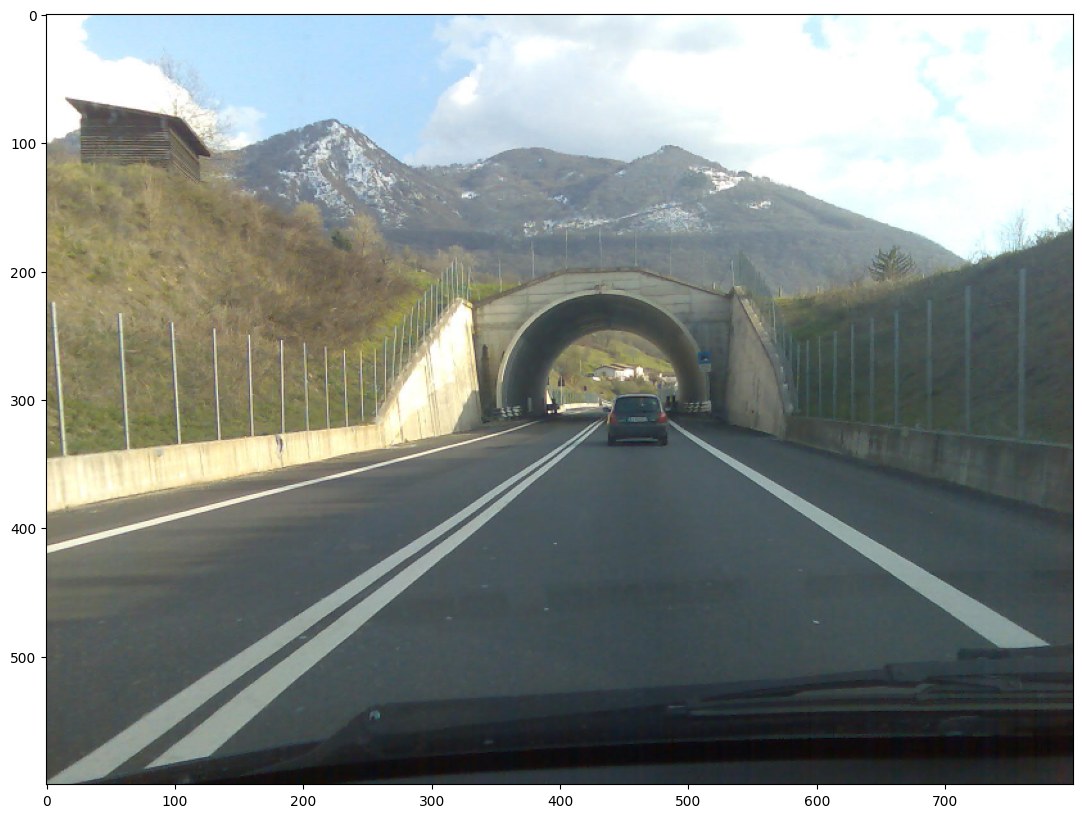

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

img = cv2.imread('dashcam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)

plt.imshow(img)

Застосовуємо оператор Canny для отримання карти країв, після чого видаляємо всі пікселі вище лінії горизонту.

(<Axes: title={'center': 'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

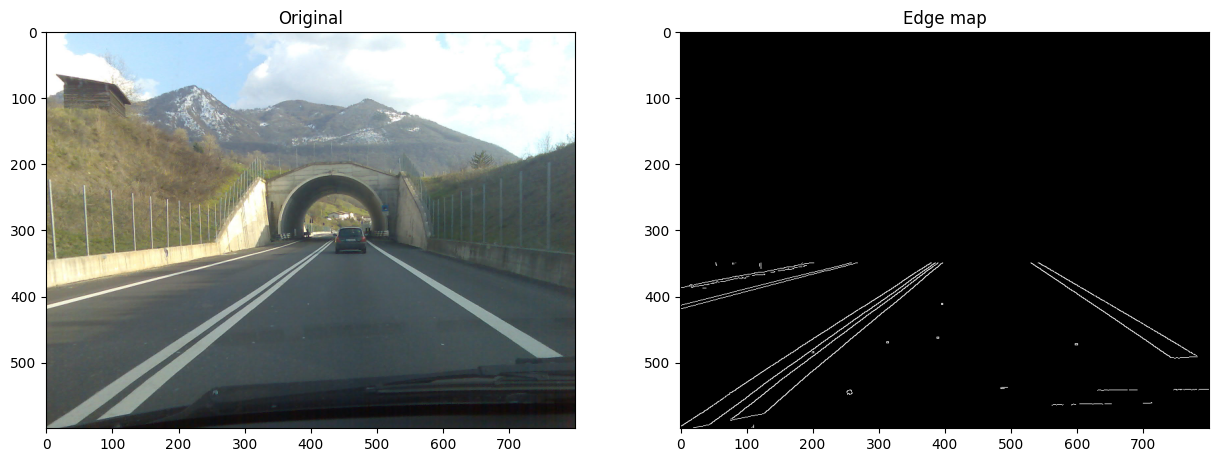

In [3]:
# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Obtain edge map
edges = cv2.Canny(gray, 100, 150)

# We are only interested in the road so we will remove everything above the horizon
edges[0:350] = 0

# Let's plot the images
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

Застосовуємо перетворення Хафа.

(<Axes: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

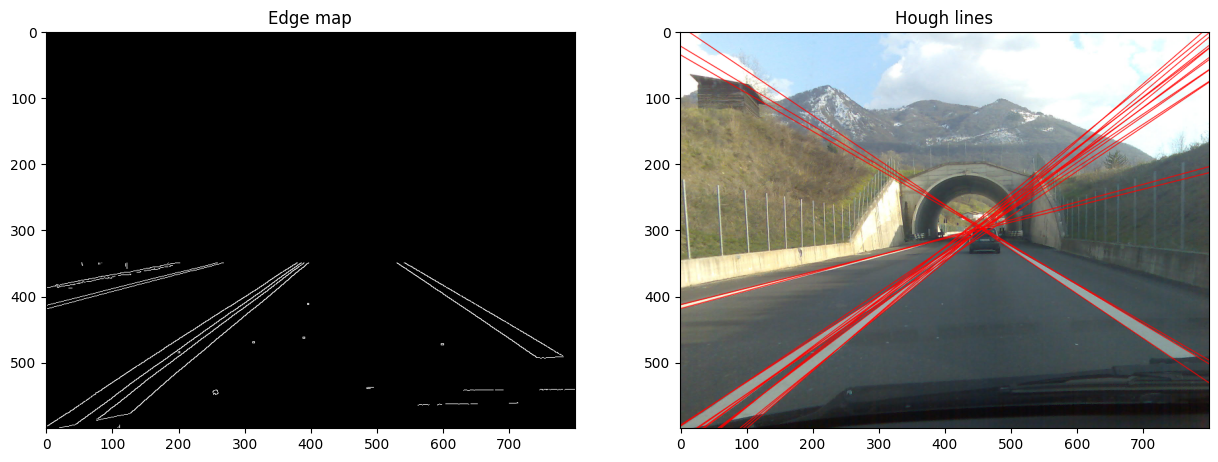

In [4]:
# Apply Hough transform to parametrize the lines
lines = cv2.HoughLines(edges, 2, np.pi/180, 190)

# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]

# Plot the resulting Hough lines
result = np.copy(img)
for line in lines:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, (255, 0, 0), 1, cv2.LINE_AA)

plt.figure()
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result), plt.title('Hough lines')

(<Axes: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

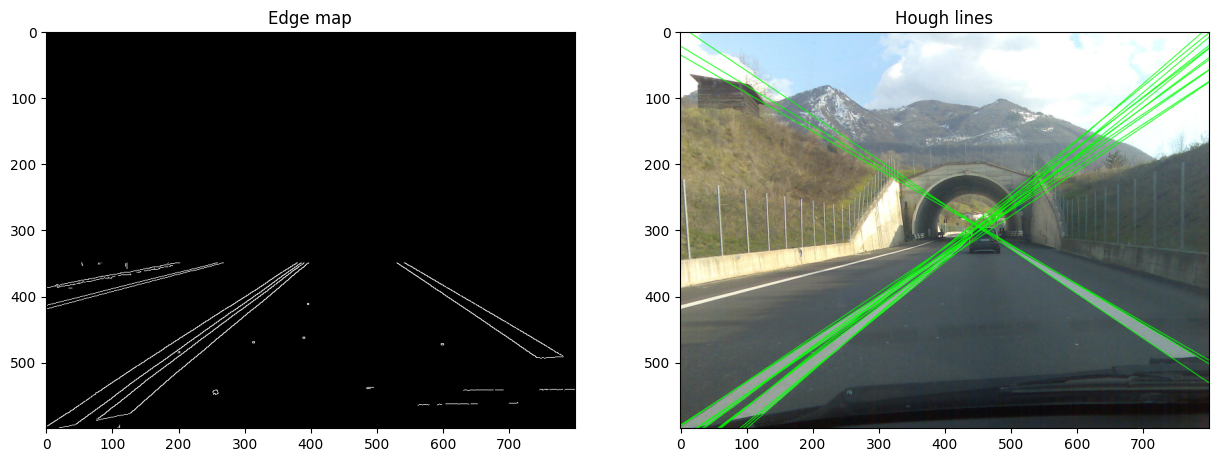

In [5]:
# Filter out all lines that are approximately vertical (+/- 20 degrees).
filtered_lines = []
for line in lines:
    # Extract theta for current line (remember Hough works with radians)
    theta = line[1]
    # Keep line if theta is not vertical
    if not (np.pi/2 - np.pi/9 < theta < np.pi/2 + np.pi/9):
        filtered_lines.append(line)


# Let's plot the resulting filtered lines
result = np.copy(img)
for line in filtered_lines:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, (0, 255, 0), 1, cv2.LINE_AA)

plt.figure()
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result), plt.title('Hough lines')

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


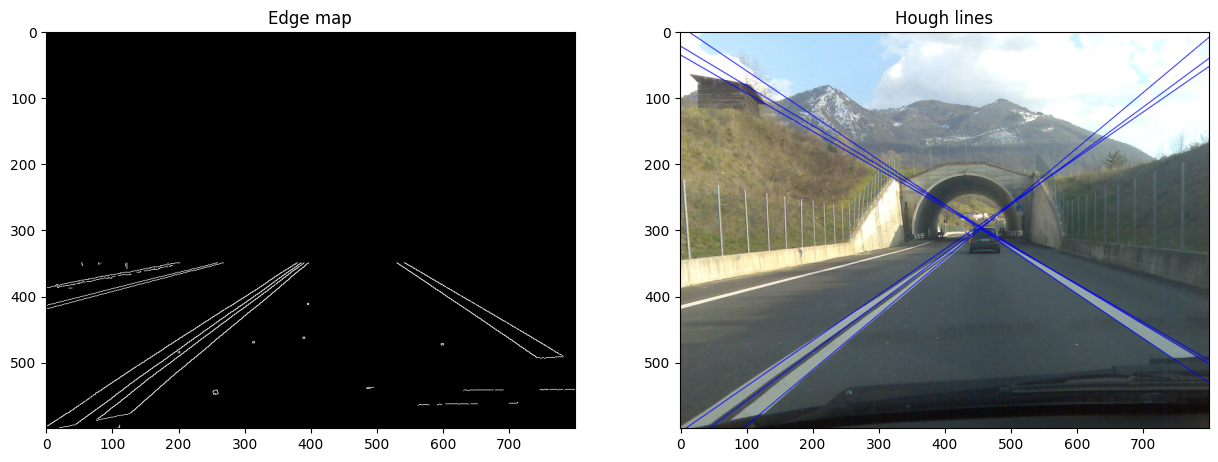

In [6]:
# We will apply k-means clustering to refine the detected lines.
kmeans = KMeans(n_clusters=6).fit(filtered_lines)
cluster_centers = kmeans.cluster_centers_

# Let's plot the resulting filtered lines
result = np.copy(img)
for line in cluster_centers:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho

    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    cv2.line(result, pt1, pt2, (0, 0, 255), 1, cv2.LINE_AA)

plt.figure()
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result), plt.title('Hough lines')

plt.show()
